In [1]:
import numpy as np
from numpy.linalg import inv, det


import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

from anneling_one import Annealing1
from hook import discrete_hook

import random
random.seed(99)

In [2]:
def xyz_gen(gen, function):
    
    x=[x[0] for x in gen]
    y=[x[1] for x in gen]
    z=[function([x[i],y[i]]) for i in range(len(gen))]
    return x,y,z

In [3]:
N1 = 100
N2 = 100
Ef = 2
EfI=  Ef*np.array([[1,0],[0,1]])
piI = 2*np.pi* np.array([[1,0],[0,1]])

A = np.array([ [1/2, np.sqrt(3)/2],
               [1/2, -np.sqrt(3)/2]]).T
invA= inv(A)
B = 2*np.pi*invA.T

def H_mat(n1,n2):
    
    k = (n1/N1)*B[:,0]+(n2/N2)*B[:,1]
    
    ka1=np.dot(A[:,0],k) # ka1,k2 = np.dot(A,k)
    ka2=np.dot(A[:,1],k)
    
    f = np.exp(1j*ka1)+ np.exp(1j*ka2)+1 
    
    f_conj= np.conj(f)
    
    H = np.array([[0, f],[f_conj,0]])
    
    return H

def det_sq(n1,n2):
    
    det_H= det( H_mat(n1,n2)-EfI )

    return np.real(det_H)*np.real(det_H)

def bands_F(n1,n2):
    
    bands= np.linalg.eigvals( H_mat(n1,n2) )

    return np.real(bands)


(2, 100, 100)


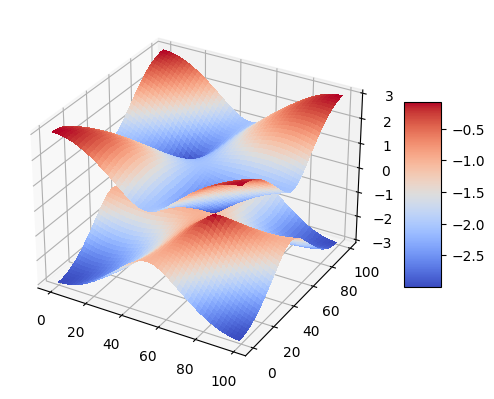

In [4]:
X1 =  np.arange(0, N1, 1)
X2 =  np.arange(0, N2, 1)

              
bands= np.transpose([[ bands_F(x1,x2) for x2 in X2] for x1 in X1], axes=[2,1,0])
print(bands.shape)  

X1, X2 = np.meshgrid(X1, X2)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

for band in bands:

    surf = ax.plot_surface(X1, X2, band, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

zsort: [2.74623303e-05 2.74623303e-05 2.74623303e-05 2.74623303e-05
 2.74623303e-05]


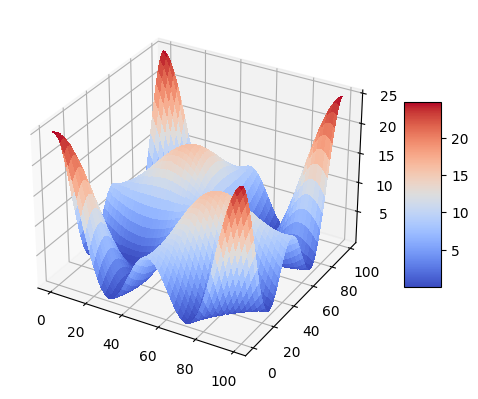

In [5]:
def fit_function(x):

    return det_sq(x[0],x[1])

X1 =  np.arange(0, N1, 1)
X2 =  np.arange(0, N2, 1)

              
Z= np.array([fit_function([x1,x2]) for x2 in X2 for x1 in X1])
print("zsort:",np.sort(Z)[:5]) 

Z= np.array([[fit_function([x1,x2]) for x2 in X2] for x1 in X1])

X1, X2 = np.meshgrid(X1, X2)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1, X2, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [6]:
# Experiment settings

#Hyperparameters of the model
model_par = {
    
    'initialTemp': 1, 
    'finalTemp': 0.0003,

    'beta': 10,
    'bounds': [[1,N1],[1,N2]],

    'nr_neighbours': 1,
    'step_size': 4,
    'gaussian_sd':5,
    
    'known_min': 8.76763323079435e-05
    
}

#
input_size = 2 # since our function has one variable this is a trivial scenario.
start_point = [20, 30]

# Experiment
experiment = Annealing1(fit_function,start_point, model_par)

In [7]:
epochs= 5
history_book = experiment.evolve( epochs, prints_p=5)

temp:1|epoch:0|change:2.7167233166899263|value:0.3819660112501067
temp:0.09090909090909091|epoch:0|change:0.7936900458542885|value:0.007702473181587789
temp:0.047619047619047616|epoch:0|change:0.3401755715078433|value:0.007702473181587789
temp:0.03225806451612903|epoch:0|change:0.2278749328838686|value:0.007702473181587789
temp:0.024390243902439025|epoch:0|change:0.06075272067760351|value:0.019948182471679596
temp:0.0196078431372549|epoch:0|change:0.3556242720052117|value:0.019948182471679596
temp:0.01639344262295082|epoch:0|change:0.30869540894794695|value:0.02203485424233016
temp:0.014084507042253523|epoch:0|change:0.04237183701814494|value:0.02203485424233016
temp:0.01234567901234568|epoch:0|change:0.9720741120964246|value:0.02203485424233016
temp:0.010989010989010988|epoch:0|change:-0.019770071206647533|value:0.0022647830356826264
temp:0.0099009900990099|epoch:0|change:4.071928128826704|value:0.0022647830356826264
temp:0.009009009009009007|epoch:0|change:0.14150105462084725|value:0

In [8]:
final_solution = experiment.actual_solution
final_value = fit_function(experiment.actual_solution)
print("final_solution:",final_solution)
print("final_value:",final_value)

final_solution: [30, 2]
final_value: 7.339717786613178e-05


In [9]:
solutions = []
solution_values=[]
for s1 in range(-100,100 ,30):
    for s2 in range(-80,80, 30):
        start_point =[s1,s2]
        experiment = Annealing1(fit_function,start_point, model_par)
        experiment.evolve( epochs, prints_p=999, tr_print=False)
        solutions.append(experiment.actual_solution)
        solution_values.append(experiment.actual_value)
        print("start points:{} |solution:{} |value:{}".format(start_point,experiment.actual_solution,experiment.actual_value))

start points:[-100, -80] |solution:[-100, -80] |value:5.000000000000004
start points:[-100, -50] |solution:[-100, -50] |value:8.999999999999998
start points:[-100, -20] |solution:[-100, -20] |value:5.000000000000008
start points:[-100, 10] |solution:[30, 2] |value:7.339717786613178e-05
start points:[-100, 40] |solution:[21, 33] |value:6.708132582789974e-05
start points:[-100, 70] |solution:[2, 72] |value:7.339717786606644e-05
start points:[-70, -80] |solution:[-70, -80] |value:0.3819660112501055
start points:[-70, -50] |solution:[-70, -50] |value:9.000000000000004
start points:[-70, -20] |solution:[-70, -20] |value:8.999999999999998
start points:[-70, 10] |solution:[21, 33] |value:6.708132582789974e-05
start points:[-70, 40] |solution:[21, 33] |value:6.708132582789974e-05
start points:[-70, 70] |solution:[2, 72] |value:7.339717786606644e-05
start points:[-40, -80] |solution:[-40, -80] |value:13.090169943749475
start points:[-40, -50] |solution:[-40, -50] |value:8.999999999999998
start 

In [10]:
solutions

[[-100, -80],
 [-100, -50],
 [-100, -20],
 [30, 2],
 [21, 33],
 [2, 72],
 [-70, -80],
 [-70, -50],
 [-70, -20],
 [21, 33],
 [21, 33],
 [2, 72],
 [-40, -80],
 [-40, -50],
 [-40, -20],
 [28, 30],
 [2, 30],
 [12, 79],
 [-10, -80],
 [-10, -50],
 [-10, -20],
 [28, 30],
 [12, 33],
 [12, 79],
 [33, 21],
 [29, 29],
 [30, 2],
 [30, 2],
 [21, 33],
 [21, 88],
 [30, 2],
 [28, 30],
 [30, 28],
 [29, 29],
 [29, 29],
 [71, 100],
 [79, 12],
 [98, 28],
 [98, 28],
 [88, 21],
 [88, 67],
 [79, 67]]

/var/folders/3_/hxxz6cjj6k92q_tqrvht1tf80000gn/T/ipykernel_68635/4267174279.py:2: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(surf, shrink=0.5, aspect=5)


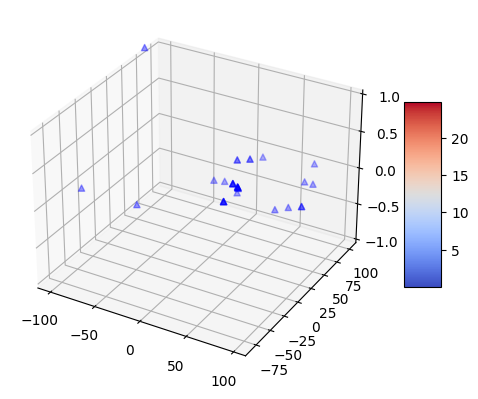

In [11]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_zlim(-1.01, 1.01)

x,y,z = xyz_gen(solutions, fit_function)
ax.scatter(x,y,z , c='b', marker='^')

In [12]:
# Clen the results
tollerance = model_par['known_min']
clean_solutions=[]
for i in range(len(solutions)):
    if solution_values[i] <= tollerance:
        clean_solutions.append(solutions[i])

/var/folders/3_/hxxz6cjj6k92q_tqrvht1tf80000gn/T/ipykernel_68635/3868486351.py:2: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(surf, shrink=0.5, aspect=5)


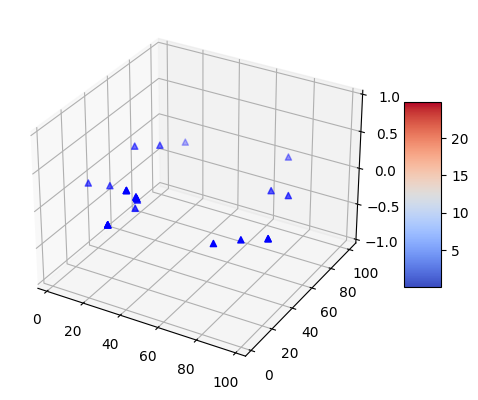

In [13]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_zlim(-1.01, 1.01)

x,y,z = xyz_gen(clean_solutions, fit_function)
ax.scatter(x,y,z , c='b', marker='^')

In [14]:
# now we need to be sure that we extract a complet contour

explored = []

total_solutions = []
total_values = []
for solution in clean_solutions:
    if solution not in explored:
        explored.append(solution)
        
        extend_solutions, extended_values = discrete_hook(fit_function,solution,boundary=[[-100,100],[-100,100]],tolerance =0.05)
        print("extended_solutions:",extend_solutions)
        for i in range(len(extend_solutions)):
            s=extend_solutions[i]
            v= extended_values[i]
            total_solutions.append(s)
            total_values.append(v)
        
        

extended_solutions: [[30, 2], [30, 3], [30, 1], [29, 1], [31, 3], [30, 4], [30, 2], [31, 4], [32, 5], [29, 0], [28, -1], [31, 5], [32, 6], [31, 6], [29, -1], [28, -2], [32, 7], [31, 7], [33, 8], [27, -3], [28, -3], [26, -4], [32, 8], [33, 9], [32, 9], [27, -4], [26, -5], [27, -5], [33, 10], [32, 10], [25, -6], [26, -6], [24, -7], [25, -7], [33, 11], [32, 11], [24, -8], [25, -8], [23, -9], [33, 12], [34, 13], [24, -9], [22, -10], [23, -10], [21, -11], [33, 13], [34, 14], [33, 14], [22, -11], [21, -12], [34, 15], [33, 15], [20, -13], [21, -13], [19, -14], [34, 16], [33, 16], [20, -14], [18, -15], [19, -15], [17, -16], [34, 17], [33, 17], [18, -16], [16, -17], [17, -17], [15, -18], [34, 18], [33, 18], [16, -18], [14, -19], [15, -19], [13, -20], [34, 19], [33, 19], [14, -20], [12, -21], [13, -21], [11, -22], [34, 20], [33, 20], [11, -21], [10, -23], [10, -22], [9, -24], [34, 21], [33, 21], [32, 21], [9, -23], [8, -25], [8, -24], [33, 22], [32, 22], [7, -25], [7, -24], [6, -26], [33, 23], [

extended_solutions: [[12, 79], [13, 79], [11, 79], [11, 78], [13, 80], [10, 77], [14, 81], [12, 79], [14, 80], [15, 81], [10, 78], [9, 77], [9, 76], [15, 82], [8, 75], [16, 83], [16, 82], [17, 83], [8, 76], [7, 75], [17, 84], [7, 76], [18, 85], [18, 84], [19, 85], [6, 74], [6, 75], [5, 73], [19, 86], [5, 74], [20, 87], [20, 86], [21, 87], [4, 73], [4, 74], [21, 88], [3, 72], [22, 89], [3, 73], [2, 72], [21, 89], [23, 90], [22, 90], [24, 91], [1, 71], [1, 72], [23, 91], [25, 92], [24, 92], [0, 71], [-1, 70], [25, 93], [24, 93], [26, 94], [-1, 71], [-2, 70], [25, 94], [27, 95], [26, 95], [-3, 69], [-3, 70], [27, 96], [26, 96], [28, 97], [-4, 69], [-4, 70], [-5, 68], [27, 97], [28, 98], [-5, 69], [-6, 68], [-6, 69], [29, 99], [28, 99], [-7, 68], [-7, 69], [-8, 67], [29, 100], [30, 101], [-8, 68], [-9, 67], [-9, 68], [29, 101], [30, 102], [-10, 67], [-10, 68], [31, 103], [30, 103], [-11, 67], [-11, 68], [31, 104], [30, 104], [32, 105], [-12, 67], [-13, 66], [31, 105], [32, 106], [31, 106],

extended_solutions: [[29, 29], [30, 29], [29, 30], [28, 29], [29, 28], [30, 28], [28, 30], [29, 29], [31, 28], [28, 31], [27, 30], [30, 27], [31, 27], [27, 31], [32, 27], [27, 32], [26, 30], [26, 31], [30, 26], [31, 26], [32, 26], [26, 32], [25, 31], [25, 32], [31, 25], [32, 25], [33, 25], [25, 33], [24, 31], [24, 32], [24, 33], [31, 24], [32, 24], [33, 24], [23, 32], [23, 33], [32, 23], [33, 23], [22, 32], [22, 33], [32, 22], [33, 22], [21, 32], [21, 33], [21, 34], [32, 21], [33, 21], [34, 21], [20, 33], [20, 34], [33, 20], [34, 20], [19, 33], [19, 34], [33, 19], [34, 19], [18, 33], [18, 34], [33, 18], [34, 18], [17, 33], [17, 34], [33, 17], [34, 17], [16, 33], [16, 34], [33, 16], [34, 16], [15, 33], [15, 34], [33, 15], [34, 15], [14, 33], [14, 34], [33, 14], [34, 14], [13, 33], [13, 34], [33, 13], [34, 13], [12, 33], [11, 32], [33, 12], [32, 11], [11, 33], [10, 32], [10, 33], [33, 11], [32, 10], [33, 10], [9, 32], [9, 33], [32, 9], [33, 9], [8, 32], [8, 33], [7, 31], [32, 8], [33, 8]

extended_solutions: [[88, 67], [89, 67], [87, 67], [87, 66], [89, 68], [90, 67], [88, 67], [90, 68], [91, 67], [86, 67], [86, 66], [91, 68], [92, 67], [92, 68], [93, 69], [85, 67], [85, 66], [93, 68], [94, 69], [94, 68], [95, 69], [84, 67], [84, 66], [95, 68], [96, 69], [96, 70], [97, 69], [83, 67], [83, 66], [97, 70], [98, 70], [99, 71], [82, 67], [82, 66], [99, 70], [100, 71], [101, 71], [81, 67], [81, 66], [101, 72], [102, 72], [103, 73], [80, 67], [80, 66], [103, 72], [104, 74], [104, 73], [105, 73], [79, 67], [79, 66], [79, 68], [105, 74], [106, 74], [106, 75], [107, 75], [78, 67], [78, 68], [107, 76], [108, 76], [108, 75], [109, 77], [77, 67], [77, 68], [109, 76], [110, 78], [110, 77], [111, 79], [76, 67], [76, 68], [76, 69], [111, 78], [112, 79], [113, 79], [75, 67], [75, 68], [75, 69], [113, 80], [114, 81], [114, 80], [115, 81], [74, 68], [74, 69], [74, 70], [115, 82], [116, 83], [116, 82], [117, 83], [73, 68], [73, 69], [73, 70], [117, 84], [118, 85], [118, 84], [119, 85], [72

/var/folders/3_/hxxz6cjj6k92q_tqrvht1tf80000gn/T/ipykernel_68635/1149142918.py:2: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(surf, shrink=0.5, aspect=5)


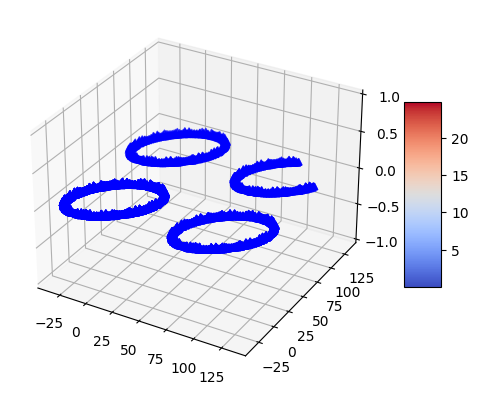

In [15]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_zlim(-1.01, 1.01)

x,y,z = xyz_gen(total_solutions, fit_function)
ax.scatter(x,y,z , c='b', marker='^')

/var/folders/3_/hxxz6cjj6k92q_tqrvht1tf80000gn/T/ipykernel_68635/194469711.py:15: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(surf, shrink=0.5, aspect=5)


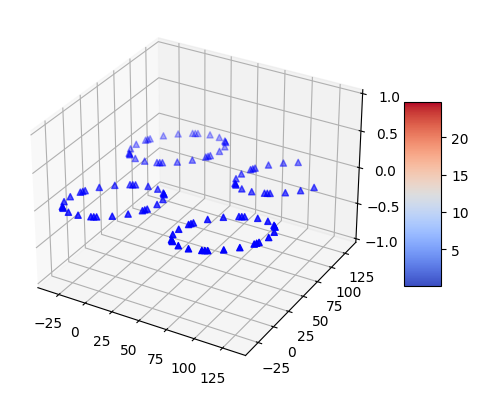

In [17]:
#final selection
f_select =[]
v_select =[]
minim = 8.76763323079435e-05

for i in range(len(total_solutions)):
    s = total_solutions[i]
    v = total_values[i]
    if v<=minim:
        if s not in f_select:
            f_select.append(s)
            v_select.append(v)
    
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_zlim(-1.01, 1.01)

x,y,z = xyz_gen(f_select, fit_function)
ax.scatter(x,y,z , c='b', marker='^')

